# BackPropagation

### Calculating Gradient Descent Steps

Example:
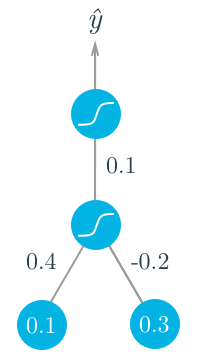

target is $y = 1$. We'll start with the forward pass, first calculating the input to the hidden unit

$h = \sum_i w_i x_i = 0.1 \times 0.4 - 0.2 \times 0.3 = -0.02$

output of the hidden unit

$a = f(h) = \mathrm{sigmoid}(-0.02) = 0.495$

the output of the network is

$\hat y = f(W \cdot a) = \mathrm{sigmoid}(0.1 \times 0.495) = 0.512$ 

the error term for the output unit is

$\delta^o = (y - \hat y) f'(W \cdot a) = (1 - 0.512) \times 0.512 \times(1 - 0.512) = 0.122$

error term for the hidden unit with backpropagation(since we have only one hidden unit, its simple; check the exercise when where we have multiple(2) hidden units.

$\delta^h = W \delta^o f'(h) = 0.1 \times 0.122 \times 0.495 \times (1 - 0.495) = 0.003$

Gradient descent steps (weight updates) for hidden-to-output:

$\Delta W = \eta \delta^o a = 0.5 \times 0.122 \times 0.495 = 0.0302$

Gradient descent steps (weight updates) for input-to-hidden:


$\Delta w_i = \eta \delta^h x_i = (0.5 \times 0.003 \times 0.1, 0.5 \times 0.003 \times 0.3) = (0.00015, 0.00045)$

In [26]:
import numpy as np


def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1 / (1 + np.exp(-x))


x = np.array([0.5, 0.1, -0.2])
target = 0.6
learnrate = 0.5

weights_input_hidden = np.array([[0.5, -0.6],
                                 [0.1, -0.2],
                                 [0.1, 0.7]])

weights_hidden_output = np.array([0.1, -0.3])

## Forward pass
hidden_layer_input = np.dot(x, weights_input_hidden)
hidden_layer_output = sigmoid(hidden_layer_input)

output_layer_in = np.dot(hidden_layer_output, weights_hidden_output)
output = sigmoid(output_layer_in)

## Backwards pass
## TODO: Calculate output error
error = (target-output) 

# TODO: Calculate error term for output layer
output_error_term = error * output * (1-output)

# TODO: Calculate error term for hidden layer
hidden_error_term = np.dot(output_error_term, weights_hidden_output) * hidden_layer_output *(1-hidden_layer_output)

# TODO: Calculate change in weights for hidden layer to output layer
delta_w_h_o = learnrate * output_error_term * hidden_layer_output

# TODO: Calculate change in weights for input layer to hidden layer
delta_w_i_h = learnrate * hidden_error_term * x[:, None]

print('Change in weights for hidden layer to output layer:')
print(delta_w_h_o)
print('Change in weights for input layer to hidden layer:')
print(delta_w_i_h)


Change in weights for hidden layer to output layer:
[0.00804047 0.00555918]
Change in weights for input layer to hidden layer:
[[ 1.77005547e-04 -5.11178506e-04]
 [ 3.54011093e-05 -1.02235701e-04]
 [-7.08022187e-05  2.04471402e-04]]


### Implementing Backpropagation
Here's the general algorithm for updating the weights with backpropagation:

 - Set the weight steps for each layer to zero.

     - The input to hidden weights $\Delta w_{ij} = 0$

     - The hidden to output weights $\Delta W_j = 0$
 
 - For each record in the training data:

     - Make a forward pass through the network, calculating the output $\hat y$ 
	 
     - Calculate the error gradient in the output unit, $\delta^o = (y - \hat y) f'(z)$ where $z = \sum_j W_j a_j$, the input to the output unit.
     - Propagate the errors to the hidden layer $\delta^h_j = \delta^o W_j f'(h_j)$
     - Update the weight steps:

         - $\Delta W_j = \Delta W_j + \delta^o a_j$
         - $\Delta w_{ij} = \Delta w_{ij} + \delta^h_j a_i$

 - Update the weights, where $\eta$ is the learning rate and mm is the number of records:

     - $W_j = W_j + \eta \Delta W_j / m$
     - $w_{ij} = w_{ij} + \eta \Delta w_{ij} / m$

 - Repeat for $e$ epochs.

In [27]:
import numpy as np
import pandas as pd

admissions = pd.read_csv('binary.csv')

# Make dummy variables for rank
data = pd.concat([admissions, pd.get_dummies(admissions['rank'], prefix='rank')], axis=1)
data = data.drop('rank', axis=1)

# Standarize features
for field in ['gre', 'gpa']:
    mean, std = data[field].mean(), data[field].std()
    data.loc[:,field] = (data[field]-mean)/std
    
# Split off random 10% of the data for testing
np.random.seed(21)
sample = np.random.choice(data.index, size=int(len(data)*0.9), replace=False)
data, test_data = data.iloc[sample], data.drop(sample)

# Split into features and targets
features, targets = data.drop('admit', axis=1), data['admit']
features_test, targets_test = test_data.drop('admit', axis=1), test_data['admit']

In [ ]:
import numpy as np
#from data_prep import features, targets, features_test, targets_test

np.random.seed(21)

def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1 / (1 + np.exp(-x))


# Hyperparameters
n_hidden = 2  # number of hidden units
epochs = 900
learnrate = 0.005

n_records, n_features = features.shape
last_loss = None
# Initialize weights
weights_input_hidden = np.random.normal(scale=1 / n_features ** .5,
                                        size=(n_features, n_hidden))
weights_hidden_output = np.random.normal(scale=1 / n_features ** .5,
                                         size=n_hidden)

for e in range(epochs):
    del_w_input_hidden = np.zeros(weights_input_hidden.shape)
    del_w_hidden_output = np.zeros(weights_hidden_output.shape)
    for x, y in zip(features.values, targets):
        ## Forward pass ##
        # TODO: Calculate the output
        hidden_input = np.dot(x, weights_input_hidden)
        hidden_output = sigmoid(hidden_input)
        output = sigmoid(np.dot(hidden_output, weights_hidden_output))

        ## Backward pass ##
        # TODO: Calculate the network's prediction error
        error = y-output

        # TODO: Calculate error term for the output unit
        output_error_term = error * output * (1-output)

        ## propagate errors to hidden layer

        # TODO: Calculate the hidden layer's contribution to the error
        hidden_error = weights_hidden_output * output_error_term 
        
        # TODO: Calculate the error term for the hidden layer
        hidden_error_term = hidden_error * hidden_output * (1-hidden_output)
        
        # TODO: Update the change in weights
        del_w_hidden_output += output_error_term * hidden_output
        del_w_input_hidden += hidden_error_term * x[:,None]
    
    print(weights_hidden_output.shape)
    print(hidden_error.shape)
    print(hidden_error_term.shape)
    print(x[:,None].shape)
    
    # TODO: Update weights  (don't forget to division by n_records or number of samples)
    weights_input_hidden += learnrate * del_w_input_hidden/n_records
    weights_hidden_output += learnrate * del_w_hidden_output/n_records

    # Printing out the mean square error on the training set
    if e % (epochs / 10) == 0:
        hidden_output = sigmoid(np.dot(x, weights_input_hidden))
        out = sigmoid(np.dot(hidden_output,
                             weights_hidden_output))
        loss = np.mean((out - targets) ** 2)

        if last_loss and last_loss < loss:
            print("Train loss: ", loss, "  WARNING - Loss Increasing")
        else:
            print("Train loss: ", loss)
        last_loss = loss

# Calculate accuracy on test data
hidden = sigmoid(np.dot(features_test, weights_input_hidden))
out = sigmoid(np.dot(hidden, weights_hidden_output))
predictions = out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))


In [6]:
test_w_i_h = np.array([[0.1, -0.2],
                       [0.4, 0.5],
                       [-0.3, 0.2]])

In [14]:
test_w_i_h[:,None].shape

(3, 1, 2)

In [12]:
test_w_i_h

array([[ 0.1, -0.2],
       [ 0.4,  0.5],
       [-0.3,  0.2]])

In [13]:
test_w_i_h.shape

(3, 2)

In [32]:
weights_hidden_to_output = np.random.normal(0.0, 2**-0.5, 
                                       (2, 1))

In [34]:
weights_hidden_to_output.shape

(2, 1)